<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/SimulacionAseguradora1.PNG" alt="drawing" width="400">

Ejercicio realizado en el curso de edX Data Science: Probability, impartido por el profesor Rafael Irizarry de la Universidad de Harvard. En este notebook se estudian las operaciones de una aseguradora.

## Base de datos: death_prob

Se comienza cargando las librerías necesarias para este ejercicio.

In [1]:
library(tidyverse)
library(dslabs)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Se utilizará la base de datos conocida como death_prob la cual contiene la probabilidad de muerte de personas ordenadas por sexo y edad. La probabilidad es para un año, los datos fueron tomados de la población de Estados Unidos en el año 2015.

In [2]:
data(death_prob)
head(death_prob)

,age,sex,prob
,<int>,<fct>,<dbl>
1,0,Male,0.006383
2,1,Male,0.000453
3,2,Male,0.000282
4,3,Male,0.000230
5,4,Male,0.000169
6,5,Male,0.000155


Se considera que se venden 1,000 pólizas, cada una cuesta 1,150 dls y, al fallecer una persona, la aseguradora tiene que pagar 150,000 dls.

In [3]:
Gan=1150
Per=-150000
n=1000

## Caso: mujeres de 50 años

Primero determinamos la probabilidad que tiene una mujer de 50 años de fallecer en el próximo año. Se observa que es de apenas el 0.3%

In [4]:
p=death_prob %>% filter(sex=="Female" & age==50) %>% .$prob
p

[1] 0.003193

Con esta probabilidad determinamos la ganancia esperada y el error estándar por cada póliza vendida. Los valores indican que se esperan ganancias por cada póliza vendida.

<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/SimulacionAseguradora2.PNG" alt="drawing" width="200">

In [5]:
Per*p+Gan*(1-p)
abs(Gan-Per)*sqrt(p*(1-p))

[1] 667.3781

[1] 8527.332

Ahora hacemos el cálculo para las 1,000 pólizas vendidas. Se espera que en un año la aseguradora gane más de 600,000 dls.

<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/SimulacionAseguradora3.PNG" alt="drawing" width="290">

In [6]:
avg=n*(Per*p+Gan*(1-p))
sd=abs(Gan-Per)*sqrt(n*p*(1-p))

avg;sd

[1] 667378.1

[1] 269657.9

Apoyándonos en una distribución normal, se determina la probabilidad de que en el próximo año la aseguradora pierda dinero. Es menor al 0.6%

In [7]:
pnorm(0,avg,sd)

[1] 0.006663556

## Caso: hombres de 50 años

Ahora se busca la probabilidad que tiene un hombre de 50 años de morir en el proximo año. Se observa que los hombres de 50 años tienen una mayor probabilidad de morir (0.5%) que las mujeres de la misma edad (0.3%).

In [8]:
p=death_prob %>% filter(sex=="Male" & age==50) %>% .$prob
p

[1] 0.005013

Se determina el costo que debería de tener la póliza para que la aseguradora tenga ganancias por 700,000 dls en el año. El cálculo nos indica que se deben de vender a 1,455 dls.

<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/SimulacionAseguradora4.PNG" alt="drawing" width="200">

In [9]:
x=(700000/n)-Per*p/(1-p)
x

[1] 1455.739

Usando el costo determinado se calcula la ganancia esperada y el error estándar.

In [10]:
Gan=x
sd=abs(Gan-Per)*sqrt(n*p*(1-p))
avg=n*(Per*p+Gan*(1-p))

avg;sd

[1] 696490.9

[1] 338254.3

Apoyándonos en la distribución normal, se determina la probabilidad de que la aseguradora presente pérdidas en el próximo año. Se observa que es de apenas el 2%.

In [11]:
pnorm(0,avg,sd)

[1] 0.01974353

## Caso: se incrementa probablidad de fallecer

Imaginemos que ocurre una epidemia que incrementa la probabilidad de fallecer de los hombres de 50 años a un 1.5%; bajo este supuesto se calculan las ganancias esperadas y el error estándar. Como se puede observar, ahora se esperan pérdidas por 1.1 millones de dls.

In [12]:
p=0.015
Gan=1150
Per=-150000
n=1000
avg=n*(Per*p+Gan*(1-p))
sd=abs(Gan-Per)*sqrt(n*p*(1-p))
avg;sd

[1] -1117250

[1] 580994.3

Utilizando una distribución normal, se determina la probabilidad que tiene la aseguradora de presentar pérdidas. Ésta es del 97%.

In [13]:
pnorm(0,avg,sd)

[1] 0.9727597

Se revisan otras probabilidades de fallecer para hombres de 50 años, considerándose que éstas pueden variar entre 1% y 3%. Se observa que aún con un valor mínimo del 1%, la aseguradora tiene una probabilidad de pérdida del 78%.

In [14]:
p=seq(0.01,0.03,0.001)
avg=n*(Per*p+Gan*(1-p))
sd=abs(Gan-Per)*sqrt(n*p*(1-p))
pnorm(0,avg,sd)

[1] 0.7764088 0.8480948 0.8989232 0.9338629 0.9573137 0.9727597 0.9827809
 [8] 0.9892027 0.9932761 0.9958377 0.9974369 0.9984289 0.9990410 0.9994167
[15] 0.9996465 0.9997864 0.9998713 0.9999226 0.9999536 0.9999723 0.9999834

Ahora se hace una simulaicón de Monte Carlo con una probabilidad de fallecimiento de 1.5%; la muestra indica que la probabilidad que tiene la aseguradora de perder dinero es del 98%, un valor muy similar al obtenido de manera teórica.

In [15]:
p=0.015
n=1000
B=10000

S=replicate(B,{
  sum(sample(c(Gan,Per),n,prob=c(1-p,p),replace=TRUE))
})

mean(S<= 0)

[1] 0.9835

Con los datos obtenidos de la simulación, se procede a realizar una gráfica del histograma de las ganancias.

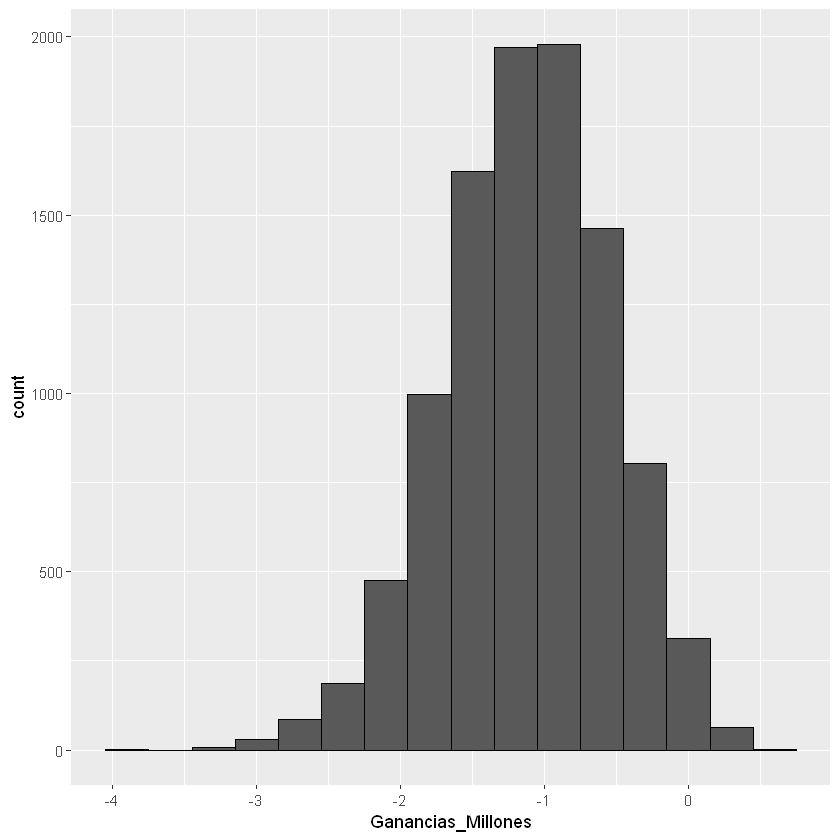

In [16]:
data.frame(Ganancias_Millones=S/10^6) %>%
  ggplot(aes(Ganancias_Millones))+
  geom_histogram(binwidth=0.3, col="black")

## Caso: la aseguradora quiebra si pierde 1 millón de dls

Ahora consideremos el caso de que la aseguradora no puede afrontar una pérdida mayor a un millón de dls. Se determina la probabilidad de perder esa cantidad de dinero en el año para una probabilidad de fallecimiento del 1.5%; el resultado indica que ésta es del 58%.

In [17]:
p=0.015
Gan=1150
Per=-150000
n=1000
avg=n*(Per*p+Gan*(1-p))
sd=abs(Gan-Per)*sqrt(n*p*(1-p))

pnorm(-1000000,avg,sd)

[1] 0.5799671

De manera similar se revisan otras probabilidades de fellecimiento para determinar para cuales es plausible en escenario en el que la aseguradora pueda sobrevivir. Se oberva que solo para probabilidades del 1% y 1.25% la aseguradora presenta una probabilidad menor al 50% de perder más de 1 millón de dls.

In [18]:
p=seq(0.01,0.03,0.0025)
avg=n*(Per*p+Gan*(1-p))
sd=abs(Gan-Per)*sqrt(n*p*(1-p))
pnorm(-1000000,avg,sd)

[1] 0.08970652 0.31179203 0.57996705 0.78523309 0.90398581 0.96118786 0.98546733
[8] 0.99487271 0.99827462

Ahora se realiza una simulación de Monte Carlo para verificar los resultados obtenidos, se observa que la ambos valores son muy similares.

In [19]:
p=0.015
n=1000
B=10000

S=replicate(B,{
  sum(sample(c(Gan,Per),n,prob=c(1-p,p),replace=TRUE))
})

mean(S<= -1000000)

[1] 0.5342

## Caso: obtener ganancias con p = 1.5%

En este caso se determina el costo de la póliza que nos permita obtener ganancias cuando la probabilidad de fallecimiento es igual a 1.5%. Para hacer esto nos apoyamos en la distribución normal y buscamos un costo de póliza que nos brinde una probabilidad de pérdidas del 5%

<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/SimulacionAseguradora5.PNG" alt="drawing" width="350">

In [20]:
z=qnorm(0.05)
x=-Per*(n*p-z*sqrt(n*p*(1-p)))/(n*(1-p)+z*sqrt(n*p*(1-p)))
x

[1] 3268.063

El cálculo nos indica que cada póliza se debe de vender a 3,268 dls. Con este nuevo costo se estima la ganancia esperada por las 1,000 pólizas vendidas. Se observa que la aseguradora espera ganar 970,000 dls.

In [21]:
Gan=x
avg=n*(Per*p+Gan*(1-p))
avg

[1] 969042.2

Ahora se realiza una simulación de Monte Carlo para corroborar el resultado.

In [22]:
p=0.015
n=1000
B=10000

S=replicate(B,{
  sum(sample(c(Gan,Per),n,prob=c(1-p,p),replace=TRUE))
})

mean(S<= 0)

[1] 0.0515

Se realiza una gráfica de las ganancias obtenidas por la simulación.

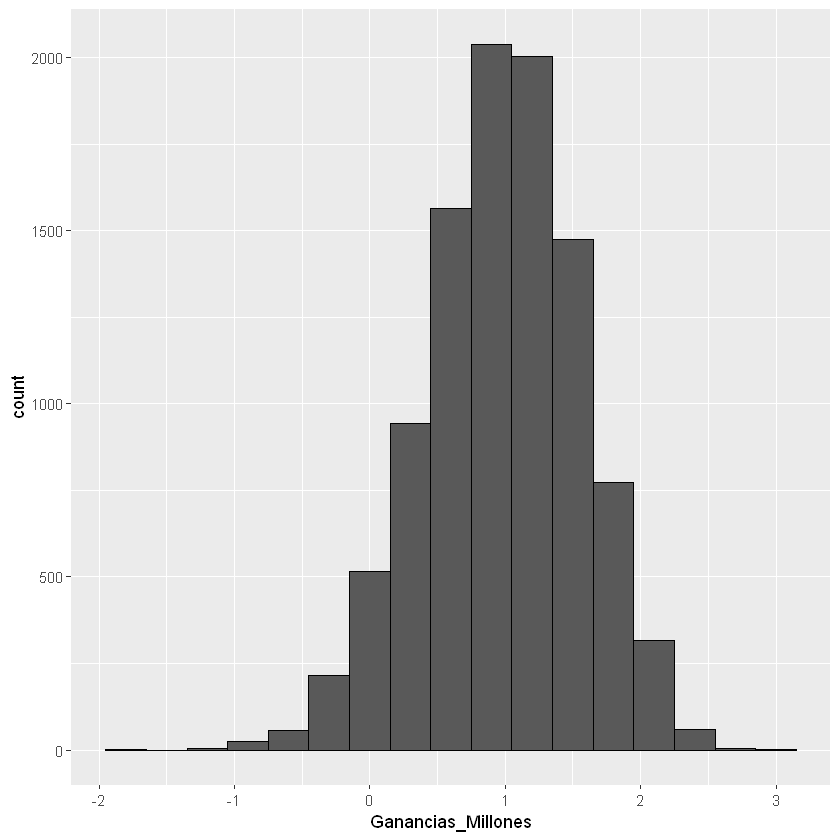

In [23]:
data.frame(Ganancias_Millones=S/10^6) %>%
  ggplot(aes(Ganancias_Millones))+
  geom_histogram(binwidth=0.3, col="black")

## Caso: Análisis de la sensibilidad de la ganancia

Por último se revisa que tan robusto es nuestro cálculo bajo la consideración de que la probabilidad de fallecimiento varía entre 0.5% y 2.5%; para hacer esto se tiene que utilizar una simulación de Monte Carlo. Se observa que, cobrándo 3,268 dls por póliza, se espera una ganancia de 980,000 dls, aunque las probabilidades de perder dinero en el siguiente año y probabilidad de bancarrota son del 19% y 4%, respectivamente. Adicionalmente, se presenta una gráfica con el histrograma de las ganancias.

In [24]:
p=0.015
n=1000
B=10000
Gan=x
Per=-150000

S=replicate(B,{
  p_nueva=p+sample(seq(-0.01, 0.01, length = 100), 1)
  sum(sample(c(Gan,Per),n,prob=c(1-p_nueva,p_nueva),replace=TRUE))
})

mean(S)
mean(S< 0)
mean(S< -1000000)

[1] 967463.5

[1] 0.1905

[1] 0.0467

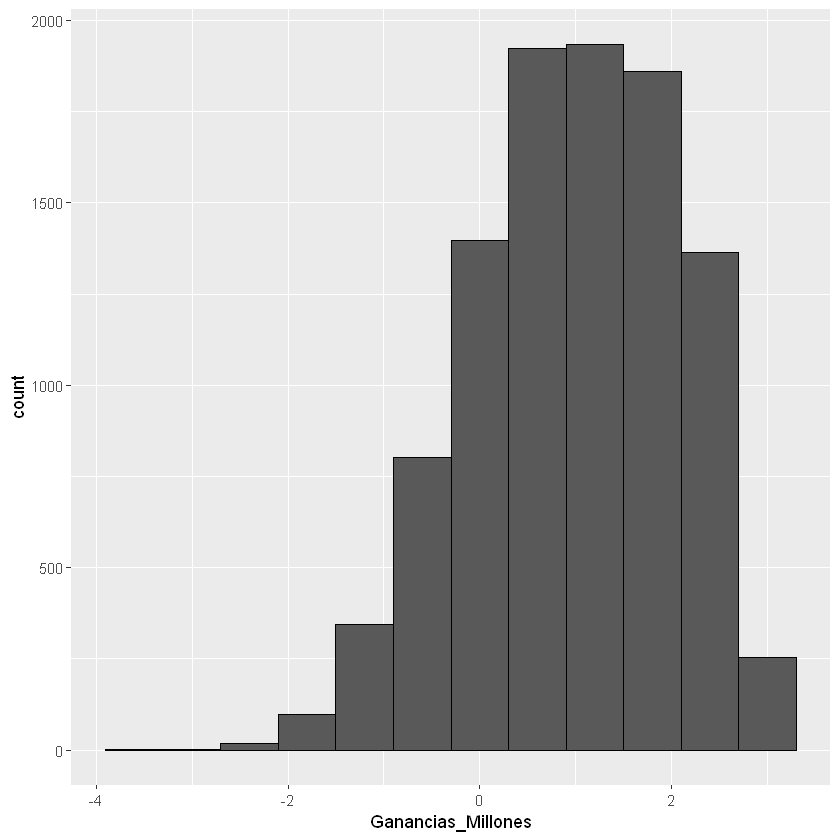

In [25]:
data.frame(Ganancias_Millones=S/10^6) %>%
  ggplot(aes(Ganancias_Millones))+
  geom_histogram(binwidth=0.6, col="black")